In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
# importing the dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [4]:
# data curation
#upload the kaggle.json file
!pip install kaggle

In [5]:
kaggle_credentials = json.load(open("/content/drive/MyDrive/Colab Notebooks/kaggle.json", "r"))

In [6]:
# setup kaggle api key as environment variables
os.environ['KAGGLE_USERNAME']= kaggle_credentials["username"]
os.environ['KAGGLE_KEY']= kaggle_credentials["key"]

In [7]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

 99% 730M/736M [00:10<00:00, 64.3MB/s]
100% 736M/736M [00:10<00:00, 71.7MB/s]


In [8]:
!ls

drive  eye-diseases-classification.zip	sample_data


In [9]:
cd /content


/content


In [10]:
!ls

drive  eye-diseases-classification.zip	sample_data


In [11]:
# unzip the downloaded dataset
with ZipFile("/content/drive/MyDrive/Colab Notebooks/eye-diseases-classification.zip",'r') as zip_ref:
  zip_ref.extractall()

In [12]:
print(os.listdir("dataset"))


print(len(os.listdir("dataset/cataract")))
print(os.listdir("dataset/cataract")[:5])

print(len(os.listdir("dataset/diabetic_retinopathy")))
print(os.listdir("dataset/diabetic_retinopathy")[:5])

print(len(os.listdir("dataset/glaucoma")))
print(os.listdir("dataset/glaucoma")[:5])

print(len(os.listdir("dataset/normal")))
print(os.listdir("dataset/normal")[:5])



['normal', 'cataract', 'glaucoma', 'diabetic_retinopathy']
1038
['_238_5389628.jpg', '2194_left.jpg', '2227_right.jpg', '_301_5387162.jpg', '_203_6969732.jpg']
1098
['10779_right.jpeg', '11445_left.jpeg', '1206_right.jpeg', '10015_left.jpeg', '119_left.jpeg']
1007
['_290_306861.jpg', '_370_7370377.jpg', '_104_4154423.jpg', '_342_3907815.jpg', '_92_2709771.jpg']
1074
['2992_left.jpg', '3240_right.jpg', '2367_left.jpg', '3394_right.jpg', '3432_left.jpg']


In [13]:
# number of classes =1038
print(len(os.listdir("dataset/cataract")))
print(os.listdir("dataset/cataract")[:5])


1038
['_238_5389628.jpg', '2194_left.jpg', '2227_right.jpg', '_301_5387162.jpg', '_203_6969732.jpg']


In [14]:
#dataset path
base_dir = 'dataset'

(1728, 2592, 3)


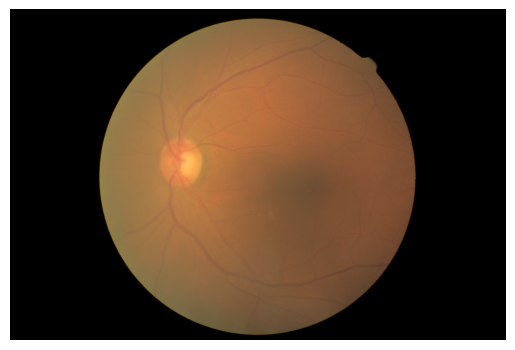

In [15]:
image_path = '/content/dataset/cataract/cataract_090.png'

#read the image
img=mpimg.imread(image_path)

print(img.shape)
#print(img)
# display the image
plt.imshow(img)
plt.axis('off') # turn off axis numbers
plt.show()

In [16]:
# uploading every image in the dataset and take a look at their initial size

data_dir = '/content/dataset/cataract'
data_lst = os.listdir(data_dir)

size_lst = []
for i in data_lst:
    full_dir = data_dir + '/' + i
    tmp_img = plt.imread(full_dir)
    size_lst.append(np.shape(tmp_img))

print('size of images:', size_lst)

size of images: [(256, 256, 3), (512, 512, 3), (512, 512, 3), (256, 256, 3), (256, 256, 3), (512, 512, 3), (512, 512, 3), (256, 256, 3), (512, 512, 3), (256, 256, 3), (512, 512, 3), (1728, 2592, 3), (1728, 2592, 3), (1728, 2592, 3), (512, 512, 3), (512, 512, 3), (1632, 2464, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (1728, 2592, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (512, 512, 3), (1728, 2592, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (512, 512, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (256, 256, 3), (256, 256, 3), (512, 512, 3), (512, 512, 3), (256, 256, 3), (512, 512, 3), (256, 256, 3), (512, 512, 3), (1728, 2592, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (512, 512, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3), (512, 512, 3), (1728, 25

In [17]:
# a function to resize images

def resizing_images(inp_img, width, height):
    resized_img = tf.image.resize(inp_img, (width,height))
    return resized_img

In [18]:
# resizing

resized_imgs = []
resized_size_lst = []
for j in data_lst:
    full_dir = data_dir + '/' + j
    tmp_img = plt.imread(full_dir)
    tmp_resized_img = resizing_images(tmp_img, width = 224, height = 224)
    resized_imgs.append(tmp_resized_img)
    resized_size_lst.append(np.shape(tmp_resized_img.numpy()))

print('size of resized images:', resized_size_lst)

size of resized images: [(224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), 

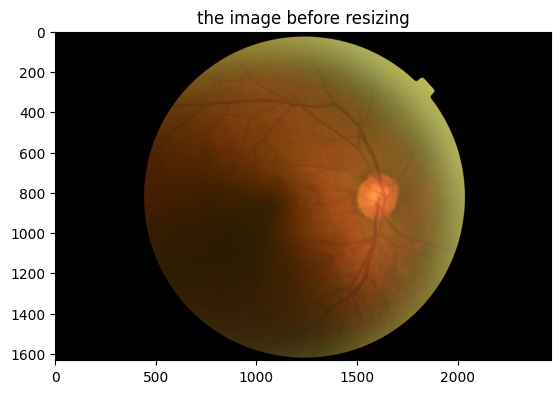

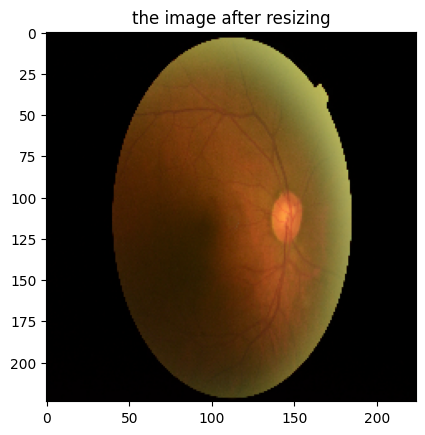

In [19]:
rnd_dir = '/content/dataset/cataract/cataract_032.png'

before_resizing_img = plt.imread(rnd_dir)
after_resizing_img = resizing_images(before_resizing_img, 224, 224)

plt.imshow(before_resizing_img)
plt.title('the image before resizing')
plt.figure()
plt.imshow(after_resizing_img)
plt.title('the image after resizing')
plt.show()

In [20]:
image_path = '/content/dataset/cataract/cataract_032.png'

#read the image
img=mpimg.imread(image_path)

print(img)

[[[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00784314 0.00392157 0.00392157]
  [0.00784314 0.00392157 0.00392157]
  [0.00784314 0.00392157 0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00784314 0.         0.00392157]
  [0.00784314 0.         0.00392157]
  [0.00784314 0.00392157 0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.01176471 0.         0.00392157]
  [0.01176471 0.         0.00392157]
  [0.01176471 0.         0.00392157]
  ...
  [0.         0.         0.        ]
  [0.00392157 0.         0.00392157]
  [0.00784314 0.00392157 0.00392157]]

 [[0.01176471 0.         0.00392157]
  [0.01176471 0.         0.00392157]


In [21]:
#Image Paramaters
img_size = 224
batch_size = 8

In [22]:
#train test split
# image data generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # use 20% of data for validation
)

In [23]:
image_path = '/content/dataset/cataract/cataract_032.png'

#read the image
img=mpimg.imread(image_path)

print(img)

[[[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00784314 0.00392157 0.00392157]
  [0.00784314 0.00392157 0.00392157]
  [0.00784314 0.00392157 0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00784314 0.         0.00392157]
  [0.00784314 0.         0.00392157]
  [0.00784314 0.00392157 0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.01176471 0.         0.00392157]
  [0.01176471 0.         0.00392157]
  [0.01176471 0.         0.00392157]
  ...
  [0.         0.         0.        ]
  [0.00392157 0.         0.00392157]
  [0.00784314 0.00392157 0.00392157]]

 [[0.01176471 0.         0.00392157]
  [0.01176471 0.         0.00392157]


In [24]:
# train generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 3376 images belonging to 4 classes.


In [25]:
# validation generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
   class_mode='categorical'
)


Found 841 images belonging to 4 classes.


# Training Section

In [26]:
train_generator.num_classes

4

Convolutional Neural Network ______

In [27]:
# cnn model definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [28]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [29]:
# compile the model
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
# model training
#training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, # number of steps per epoch
    epochs=20, # number of epoch
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size # validation steps
)

Epoch 1/20
422/422 [==============================] - 36s 75ms/step - loss: 0.8149 - accuracy: 0.6982 - val_loss: 1.3231 - val_accuracy: 0.5464
Epoch 2/20
422/422 [==============================] - 31s 72ms/step - loss: 0.5119 - accuracy: 0.7749 - val_loss: 1.0851 - val_accuracy: 0.5512
Epoch 3/20
422/422 [==============================] - 32s 75ms/step - loss: 0.4600 - accuracy: 0.7977 - val_loss: 1.5550 - val_accuracy: 0.5440
Epoch 4/20
422/422 [==============================] - 31s 73ms/step - loss: 0.4370 - accuracy: 0.8122 - val_loss: 0.9347 - val_accuracy: 0.5536
Epoch 5/20
422/422 [==============================] - 31s 72ms/step - loss: 0.4122 - accuracy: 0.8258 - val_loss: 1.2565 - val_accuracy: 0.5405
Epoch 6/20
422/422 [==============================] - 30s 72ms/step - loss: 0.3969 - accuracy: 0.8318 - val_loss: 1.1228 - val_accuracy: 0.5476
Epoch 7/20
422/422 [==============================] - 31s 72ms/step - loss: 0.3555 - accuracy: 0.8528 - val_loss: 1.2685 - val_accuracy:

In [31]:
# model evaluation/ validation check
print("Evaluating model...")
val_loss,val_accuracy = model.evaluate(validation_generator,steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy is: {val_accuracy * 100:.2f}%")

Evaluating model...
105/105 [==============================] - 2s 23ms/step - loss: 1.8602 - accuracy: 0.5607
Validation Accuracy is: 56.07%


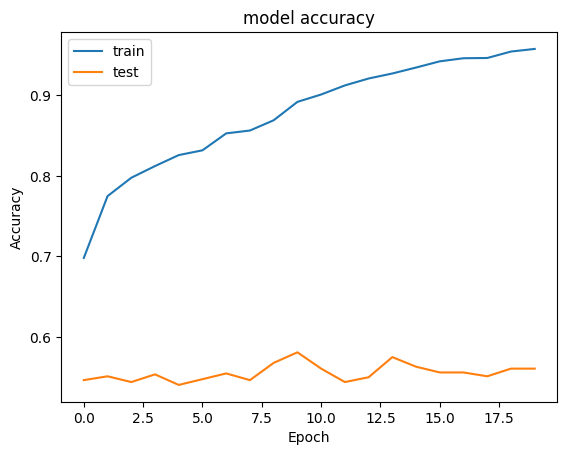

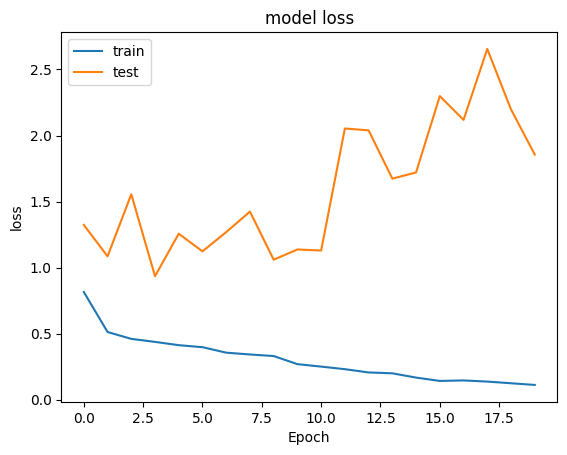

In [32]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [33]:
# building a predictive system
#function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path,target_size=(224,224)):
  # load the image
  img=Image.open(image_path)
  #resize the image
  img=img.resize(target_size)
  # convert the image to a numpy array
  img_array = np.array(img)
  # add batch dimension
  img_array = np.expand_dims(img_array,axis=0)
  # scale the image value to [0,1]
  img_array = img_array.astype('float32') / 255.
  return img_array

  # function to predict the class of an image
def predict(model,image_path,class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions,axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [34]:
# create amapping from class indices to class names
class_indices = {v:k for k, v in train_generator.class_indices.items()}

In [35]:
class_indices

{0: 'cataract', 1: 'diabetic_retinopathy', 2: 'glaucoma', 3: 'normal'}

In [36]:
#saving the class names as json file
json.dump(class_indices, open('class_indices.json','w'))

your input image is: _______________


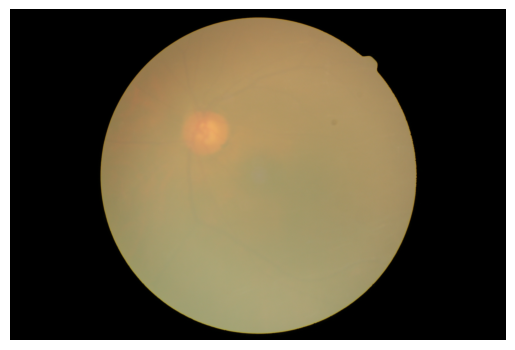

1/1 [==============================] - 0s 283ms/step
predicted class name: cataract


In [37]:
# usage
imagepath = '/content/cataract_082.png'
print("your input image is: _______________")

# Load and display the input image
image = cv2.imread(imagepath)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

predicted = predict(model,imagepath,class_indices)
# output the result
print("predicted class name:", predicted)


In [42]:
model.save("/content/drive/MyDrive/Colab Notebooks/trained Model")